<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Обзор-сюжетов-на-WordCLouds:" data-toc-modified-id="Обзор-сюжетов-на-WordCLouds:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обзор сюжетов на WordCLouds:</a></span><ul class="toc-item"><li><span><a href="#Позитивные-комментарии:" data-toc-modified-id="Позитивные-комментарии:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Позитивные комментарии:</a></span></li><li><span><a href="#Негативные-комментарии:" data-toc-modified-id="Негативные-комментарии:-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Негативные комментарии:</a></span></li></ul></li><li><span><a href="#Разделение-данных-на-выборки-в-соотношении-80/20" data-toc-modified-id="Разделение-данных-на-выборки-в-соотношении-80/20-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разделение данных на выборки в соотношении 80/20</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a  href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#Итоговые-метрики:" data-toc-modified-id="Итоговые-метрики:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Итоговые метрики:</a></span></li><li><span><a  href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп» 

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Загрузка и изучение данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from tqdm import notebook
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score, confusion_matrix

from IPython.display import display

from sklearn.metrics import classification_report

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
RANDOM_STATE = 42

In [9]:
try:
    data = pd.read_csv('/data/toxic_comments.csv')
except:
    data = pd.read_csv('/content/toxic_comments.csv')

In [10]:
for _ in [data]:
    print('Первые 5 строк:')
    display(_.head())
    print()
    print('Последние 5 строк:')
    display(_.tail())
    print()
    print('Общая информация по таблице:')
    print()
    print(_.info())
    print()
    print('Статистика по таблице:')
    display(_.describe())
    print()
    print('Всего явных дубликатов:', _.duplicated().sum())
    print()
    print('Количество пропусков:')
    display(_.isna().sum())
    print()
    print('Целевой признак, соотношение значений:')
    display(_.toxic.value_counts(normalize=True))


Первые 5 строк:


,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0



Последние 5 строк:


,Unnamed: 0,text,toxic
159287,159446,""":::::And for the second time of asking, when ...",0
159288,159447,You should be ashamed of yourself \n\nThat is ...,0
159289,159448,"Spitzer \n\nUmm, theres no actual article for ...",0
159290,159449,And it looks like it was actually you who put ...,0
159291,159450,"""\nAnd ... I really don't think you understand...",0



Общая информация по таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
None

Статистика по таблице:


,Unnamed: 0,toxic
count,159292.000000,159292.000000
mean,79725.697242,0.101612
std,46028.837471,0.302139
min,0.000000,0.000000
25%,39872.750000,0.000000
50%,79721.500000,0.000000
75%,119573.250000,0.000000
max,159450.000000,1.000000



Всего явных дубликатов: 0

Количество пропусков:


Unnamed: 0    0
text          0
toxic         0
dtype: int64


Целевой признак, соотношение значений:


0    0.898388
1    0.101612
Name: toxic, dtype: float64

### Вывод:
1. Данные представляют собой таблицу с разметкой комментариев на положительные и отрицательные
2. Соотношение отрицательных и положительных значений в целевом признаке 10.16% / 89.84%, будем это учитывать
3. Столбец "Unnamed: 0" нужно удалить, так как не несет полезной информации для изучения
4. Пропуски, дубликаты, аномалии не выявлены
5. Всего 159292 строк

## Подготовка

### Обзор сюжетов на WordCLouds:

In [11]:
def generate_wordcloud(text,Title):
    all_text = " ".join(text)
    wordcloud = WordCloud(width=800,
                          height=400,
                          stopwords=set(STOPWORDS),
                          background_color='black').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

#### Позитивные комментарии:

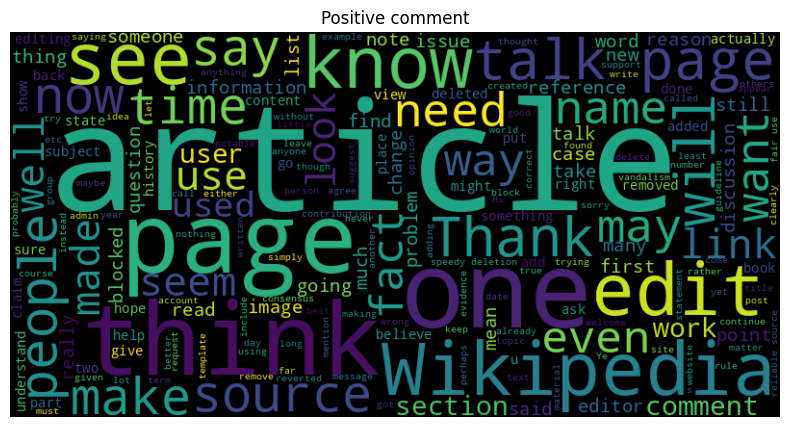

In [12]:
positive = data[data['toxic']==0]['text'].tolist()
generate_wordcloud(positive,'Positive comment')

#### Негативные комментарии:

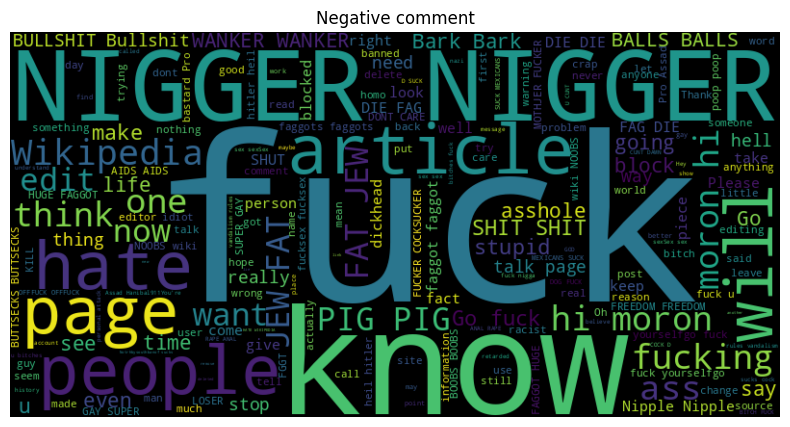

In [13]:

negative = data[data['toxic']==1]['text'].tolist()
generate_wordcloud(negative,'Negative comment')

### Очистка текста

Удалим столбец "Unnamed: 0"

In [14]:
data = data.drop(['Unnamed: 0'], axis=1)

In [15]:
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Очистим текст, для этого создадим функцию для очистки текста:

In [16]:
def clear(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = ' '.join(text.split())
    return text

data['text'] = data['text'].apply(clear)

In [17]:
data.head()

,text,toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i m se...,0
2,hey man i m really not trying to edit war it s...,0
3,more i can t make any real suggestions on impr...,0
4,you sir are my hero any chance you remember wh...,0


In [18]:
def pos_tagging (word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,               #прилагательное
                "N": wordnet.NOUN,              #существительное
                "V": wordnet.VERB,              #глагол
                "R": wordnet.ADV                #наречие
               }
    return tag_dict.get(tag, wordnet.NOUN)


In [19]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    text = [lemmatizer.lemmatize(w, pos_tagging(w)) for w in nltk.word_tokenize(text)]
    return ' '.join(text)

data['text_lemm'] = data['text'].apply(lemmatize_text)

In [20]:
data.head()

,text,toxic,text_lemm
0,explanation why the edits made under my userna...,0,explanation why the edits make under my userna...
1,d aww he matches this background colour i m se...,0,d aww he match this background colour i m seem...
2,hey man i m really not trying to edit war it s...,0,hey man i m really not try to edit war it s ju...
3,more i can t make any real suggestions on impr...,0,more i can t make any real suggestion on impro...
4,you sir are my hero any chance you remember wh...,0,you sir be my hero any chance you remember wha...


### Разделение данных на выборки в соотношении 80/20

In [21]:
corpus = data['text_lemm'].values

In [22]:
features = corpus
target = data['toxic'].values

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=RANDOM_STATE)

In [ ]:
tf_idf = TfidfVectorizer(stop_words='english')

train_features = tf_idf.fit_transform([str(row) for row in train_features])
test_features = tf_idf.transform([str(row) for row in test_features])

## Обучение

### LogisticRegression

In [24]:
print(train_features.shape)
print(test_features.shape)
print(train_target.shape)
print(test_target.shape)

(127433, 131729)
(31859, 131729)
(127433,)
(31859,)


In [25]:
%%time

lr_model = LogisticRegression()
parameters = {'C': [0.1, 2, 5, 10],
              'random_state': [42],
              'max_iter': [400],
              'class_weight': ['balanced']}

model_ir_selection = GridSearchCV(lr_model, parameters, scoring='f1',cv=3)
model_ir_selection.fit(train_features, train_target)
print("Лучшие параметры модели:")
print()
LR_best_params = model_ir_selection.best_params_
print(LR_best_params)
print()
print('F1:', model_ir_selection.best_score_)


Лучшие параметры модели:

{'C': 10, 'class_weight': 'balanced', 'max_iter': 400, 'random_state': 42}

F1: 0.7574032437307153
CPU times: user 1min 20s, sys: 1min 25s, total: 2min 46s
Wall time: 1min 35s


In [27]:
predict_test = model_ir_selection.predict(test_features)
f1_lr_test = f1_score(test_target, predict_test)
print('F1 на модели логистической регрессии:', f1_lr_test )
print('Матрица ошибок')
print(confusion_matrix(test_target, predict_test))

F1 на модели логистической регрессии: 0.7631884057971016
Матрица ошибок
[[27592  1066]
 [  568  2633]]


### LGBMClassifier

In [28]:
%%time

LightGBM_model = LGBMClassifier()
hyperparams = [{'max_depth' : [1, 2, 5],
                'learning_rate':[0.03, 0.1, 0.3],
                'n_estimators' : [20, 100, 200, 500],
                'random_state':[42]}]
model_lgbm_selection = GridSearchCV(LightGBM_model, hyperparams, scoring='f1',cv=3)
model_lgbm_selection.fit(train_features, train_target)
print("Лучшие параметры модели:")
print()
LGBM_best_params = model_lgbm_selection.best_params_
print(LGBM_best_params)
print()
print('F1:', model_lgbm_selection.best_score_)


Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [38]:
prediction = model_lgbm_selection.predict(test_features)
f1_lgbm_test = f1_score(test_target, prediction)
print('F1:', f1_lgbm_test)
print()
print('Матрица ошибок')
print(confusion_matrix(test_target, prediction))
print()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
F1: 0.7636621717530163

Матрица ошибок
[[28375   283]
 [ 1049  2152]]



### Итоговые метрики:

In [41]:
models = ['LGBMClassifier',
          'LogisticRegression']

df = {'F1 на тестовой выборке': [f1_lgbm_test, f1_lr_test],
      'Время обучения': ['50min 21s','2min 46s']


}
control_metrics = pd.DataFrame(data=df, index=models)
control_metrics

,F1 на тестовой выборке,Время обучения
LGBMClassifier,0.763662,50min 21s
LogisticRegression,0.763188,2min 46s


## Итоговый вывод

1. Данные представляют собой таблицу с разметкой комментариев на положительные и отрицательные
2. Обнаружен сильно выраженый дисбаланс классов. Соотношение отрицательных и положительных значений в целевом признаке 10.16% / 89.84%
3. Столбец "Unnamed: 0" удалили, так как не несет полезной информации для изучения
4. Пропуски, дубликаты, аномалии не выявлены
5. Всего 159292 строк
6. Текст комментариев очищен он посторонних символов, лемматизирован, преобразован TF-IDF с учетом стоп-слов
7. Данные поделены тренировочную и тестовую выборки в соотношении 80/20
8. Обучены две модели, наилучшие параметры:
* LinearRegression с параметрами: {'C': 10, 'class_weight': 'balanced', 'max_iter': 400, 'random_state': 42}

* LGBMClassifier с параметрами: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500, 'random_state': 42}
9. Получены результаты контрольной метрики F1 на тестовых данных, удовлетворяющие условию задачи F1 > 0.75:

|        |F1 на тестовой выборке|	Время обучения|
|--------|-----------------------|--------------|
|LGBMClassifier|	0.763662	|50min 21s|
|LogisticRegression	|0.763188	|2min 46s|


10. Анализ матриц ошибок показал, что LogisticRegression чаще верно предсказывает токсичные комментарии и меньше ошибается в предсказаниях токсичных комментариев чем LGBMClassifier
11. В совокупности, при чуть худшем качестве контрольной метрики F1, рекомендуется LogisticRegression, которая, несравнимо, быстрее работает, лучше предсказывает токсичные комментарии и меньше ошибается в предсказаниях токсичных комментариев - что и требуется для лучшей модерации, а значит полезнее для бизнеса.